# 虚谷号GPIO之串口通讯

    描述：通过串口通信，将信息内容转发到PC端的串口。
    
    实现：调用xugu库中的SerialMgt(port, baudrate)函数，port指虚谷号连接PC的串口号,baudrate为串口波特率。当不设置串口号和波特率时,虚谷库默认使用/dev/ttyGS0串口,波特率为115200。再调用SerialMgt.write(data)向串口中写入数据,data为写入的数据,类型为String。

**注意：**第一次引用xugu库时，虚谷号将检查板载Arduino上是否烧写了Firmata协议。如果没有，将调用烧写工具，给Arduino写Firmata协议的固件。这个过程需要十多秒时间。你将看到板子上有Led在闪烁。

工作原理描述：

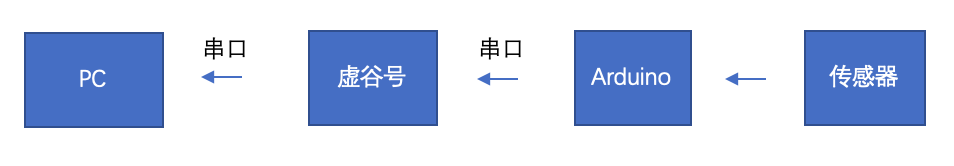


串口通讯的几点说明：

    （1）在一些特定场景下（如Wi-Fi无法使用），在U盘模式下通过串口功能可以获得传感器的信息。即把虚谷号当成Arduino或者micro:bit、掌控板来使用。
    
    （2）借助这个功能，虚谷号可以当成一个可以上网、功能强大的Arduino来使用，可以与一些使用串口功能的程序配合使用。
    （3）使用串口功能，PC端要安装串口驱动软件。驱动在vvBoard文件夹中。

### 范例：通过串口转发模拟传感器数值

使用xugu 库中Pin、XuguLog、SerialMgt类，读取模拟传感器数值打印到文本内并通过PC串口输出。

In [ ]:
from xugu import Pin, XuguLog, SerialMgt # 从 xugu 库中导入 Pin、XuguLog、SerialMgt类
import time # 导入时间模块

设置读取模拟传感器数值的次数

In [ ]:
test = 20

选择读取的引脚初始化

In [ ]:
p = Pin("A0", Pin.ANALOG)

初始化串口

In [ ]:
ser = SerialMgt()

创建文本保存的路径。不指定路径时，文件保存在与虚谷号GPIO范例同级路径下

In [ ]:
f=XuguLog('read_analog_20_times.log') # 当不指定路径时,log文件保存在与虚谷号GPIO范例同级路径下
#f=XuguLog('/home/scope/analog_input.log') # 初始化日志对象,当指定路径时 log 文件保存在指定路径下

**注**：如果使用U盘模式运行使用XuguLog功能的代码，将无法正常获取log文件！！！需要指定路径（/home/scope/vvBoard/Python）

每500ms读取数值保存在文本内并写入到串口，循环读取20次，在 PC 端建议通过串口工具打开对应的串口号，即可查看虚谷板写入的内容。

运行下面这个程序前需要打开串口工具，并打开串口接受数据。

**注**：windows7系统的电脑挂载不上串口，windows10系统的电脑可以挂载上串口

In [ ]:
while test > 0:
    value = p.read_analog() #读取 A0 引脚的电压值
    f.write(str(value)) # 将变量 value 写入到日志文件中
    print(value) # 将 value 的值打印到终端
    ser.write(str(value).encode()) # 将 value 的值写入串口
    test -= 1 # 计数自减 1
    time.sleep(0.5) # 持续 500ms

**注：**运行到这里，如果不需要运行程序或者关闭窗口，请先点击上方的黑色正方形中断服务。如果打开笔记的时候，程序已经运行，需先选择上方“服务”->再选择“重启 & 清空输出”，便可重新运行程序。